# Bike Sales Data Analysis

### Importing libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
filename = '/home/xd/Desktop/repos/data-science-projects/bike-sales/data.csv'
df = pd.read_csv(filename)

In [20]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,"$40,000.00",1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,"$30,000.00",3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,"$80,000.00",5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,"$70,000.00",0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,"$30,000.00",0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


### Cleaning the data

In [21]:
# Checking for missing values
df.isna().any(axis=0)

ID                  False
Marital Status      False
Gender              False
Income              False
Children            False
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance    False
Region              False
Age                 False
Purchased Bike      False
dtype: bool

In [22]:
# Checking for duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1021     True
1022     True
1023     True
1024     True
1025     True
Length: 1026, dtype: bool

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [25]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income              object
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [26]:
# Converting the Income column to int type
df['Income'] = df['Income'].apply(lambda x: ''.join(i for i in x[:-2] if i.isnumeric()))

In [27]:
df['Income'] = df['Income'].astype('int64')

In [28]:
df['Income'].head()

0    40000
1    30000
2    80000
3    70000
4    30000
Name: Income, dtype: int64

In [29]:
df['Marital Status'] = df['Marital Status'].replace({'M': 'Married', 'S': 'Single'})

In [14]:
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [15]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [17]:
# Dropping the ID column
df.drop(columns='ID', inplace=True)

KeyError: "['ID'] not found in axis"

In [20]:
df['Commute Distance'] = df['Commute Distance'].replace('10+ Miles', 'More than 10 Miles')

### Analyzing the Data

In [21]:
df.columns

Index(['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [22]:
df.describe()

,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,56360.000000,1.898000,1.442000,44.163000
std,31085.635215,1.628572,1.125123,11.364488
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


### Creating 'Age bracket' column

In [23]:
def age_bracket(age):
    if age < 31:
        return 'Adolescent'
    elif 31 <= age <= 54:
        return 'Middle Age'
    else:
        return 'Old'

In [24]:
df['Age Bracket'] = df['Age'].apply(age_bracket)

In [25]:
df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Bracket
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,Middle Age
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,Middle Age
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,Old
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,Middle Age
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,Middle Age


### What is the average income of those who bought and those who did not buy a bike?

Text(0.5, 1.0, 'Average Income of Bike-Purchasers & Non-Purchasers')

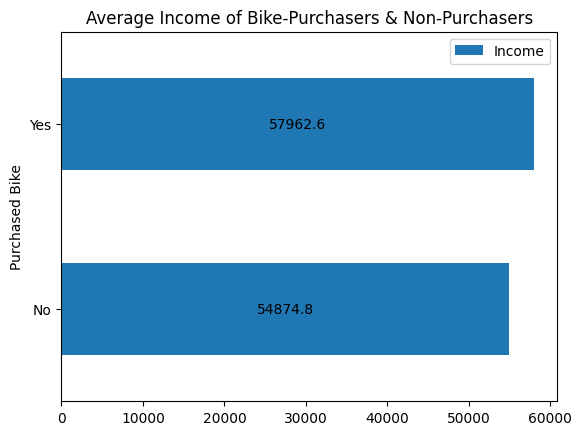

In [161]:
ax = df.groupby('Purchased Bike')['Income'].mean().plot(kind='barh')
ax.bar_label(ax.containers[0], label_type='center')
ax.legend()
ax.set_title('Average Income of Bike-Purchasers & Non-Purchasers')
# plt.xticks(rotation=0)

Bike-purchasers have higher average income than non-purchasers

#### Average Income of Bike-Purchasers Based on Gender

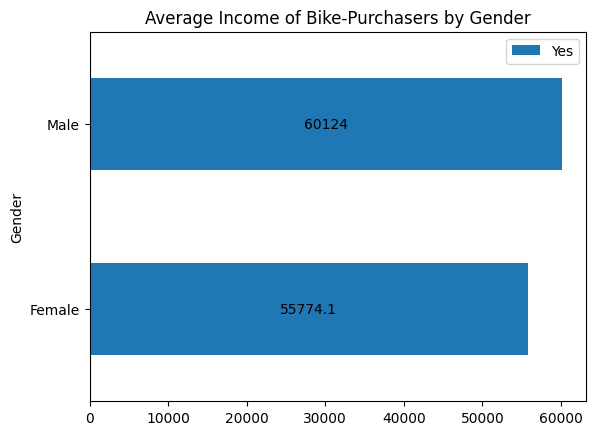

In [160]:
ax = df.groupby(['Purchased Bike', 'Gender'])['Income'].mean().unstack(0)['Yes'].plot(kind='barh', stacked=True)
ax.bar_label(ax.containers[0], label_type='center')
ax.set_title('Average Income of Bike-Purchasers by Gender')
ax.legend()
# plt.xticks(rotation=0)

The males who bought bikes had higher average income than the females bike-purchasers

### Bike Purchases by Commuting Distance

In [49]:
df.groupby(['Commute Distance','Purchased Bike']).size()

Commute Distance    Purchased Bike
0-1 Miles           No                166
                    Yes               200
1-2 Miles           No                 92
                    Yes                77
2-5 Miles           No                 67
                    Yes                95
5-10 Miles          No                116
                    Yes                76
More than 10 Miles  No                 78
                    Yes                33
dtype: int64

In [50]:
def compute_percents(df):
    n_index = len(df.index)
    percents = []
    for i in range(0, n_index, 2):
        total = 0
        for j in range(i, i+2):
            total += df.iloc[j]
        # print(i, total)
        for k in range(i, i+2):
            percents.append(round(((df.iloc[k] / total)*100), 2))
    return percents

In [51]:
def convert_to_df(series):
    x = pd.DataFrame(series, columns=['Count'])
    percents = compute_percents(series)
    x['%'] = percents
    return x

In [52]:
convert_to_df(df.groupby(['Commute Distance','Purchased Bike']).size())

Count      %
Commute Distance   Purchased Bike              
0-1 Miles          No                166  45.36
                   Yes               200  54.64
1-2 Miles          No                 92  54.44
                   Yes                77  45.56
2-5 Miles          No                 67  41.36
                   Yes                95  58.64
5-10 Miles         No                116  60.42
                   Yes                76  39.58
More than 10 Miles No                 78  70.27
                   Yes                33  29.73

~55% of the people who commute 0-1 miles bought bikes while only ~30% of those who commute more than 10 miles bought bikes. ~59% of the people who commute 2-5 miles bought bikes

array([<Axes: ylabel='0-1 Miles'>, <Axes: ylabel='1-2 Miles'>,
       <Axes: ylabel='2-5 Miles'>, <Axes: ylabel='5-10 Miles'>,
       <Axes: ylabel='More than 10 Miles'>], dtype=object)

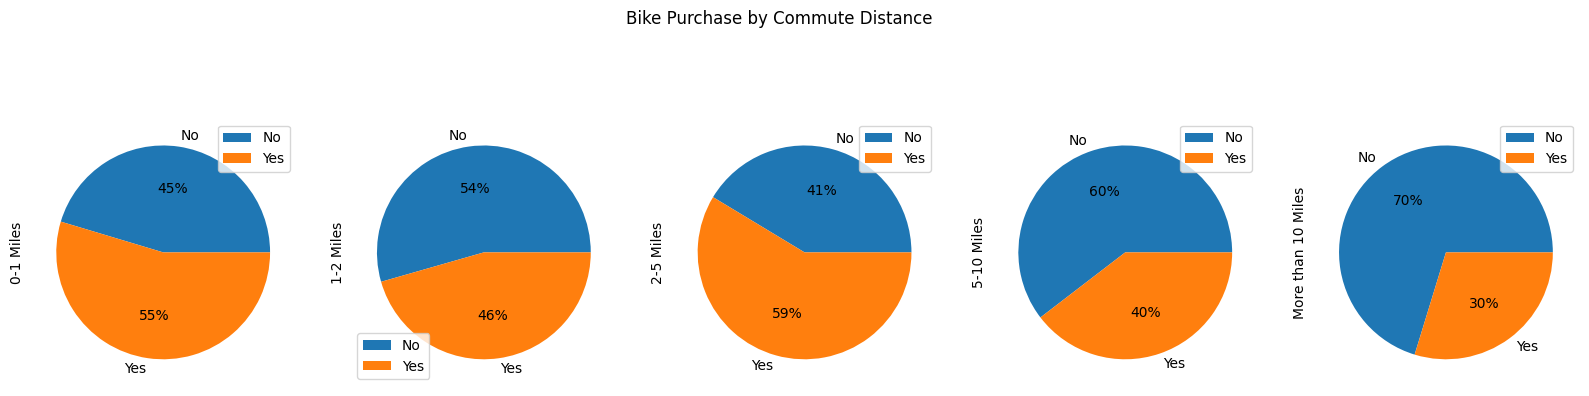

In [145]:
df.groupby(['Commute Distance','Purchased Bike']).size().unstack(0).plot(kind='pie',
                                                                        subplots=True,
                                                                        autopct='%1.0f%%',
                                                                        figsize=(20, 5),
                                                                        title='Bike Purchase by Commute Distance')

### How does bike purchasing behavior differ between genders?

array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

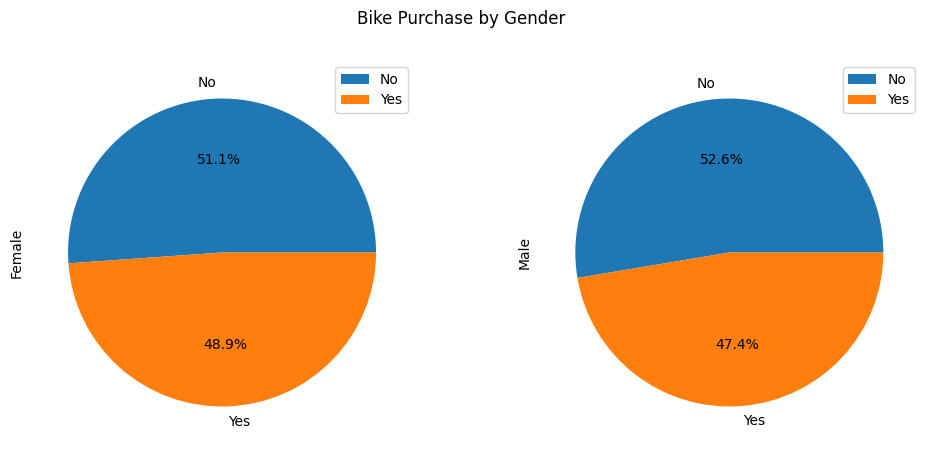

In [122]:
df.groupby(['Gender', 'Purchased Bike']).size().unstack(0).plot(kind='pie',
                                                                subplots=True,
                                                                autopct='%1.1f%%',
                                                                figsize=(12, 5),
                                                                title='Bike Purchase by Gender')

Less than 50% of each gender purchased bikes

### Which Age Bracket purchased the most bikes?

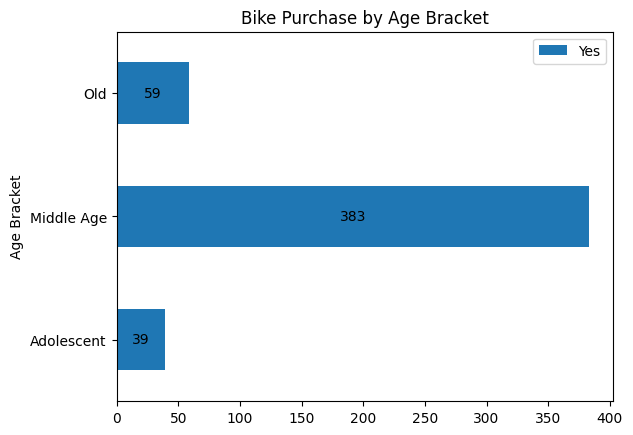

In [119]:
ax = df.groupby(['Age Bracket','Purchased Bike']).size().unstack()['Yes'].plot(kind='barh',
                                                                            title='Bike Purchase by Age Bracket')
ax.bar_label(ax.containers[0], label_type='center')
ax.legend()

Middle-Aged people purchased the most number of bikes

#### What percentage of each age bracket bought bike

array([<Axes: ylabel='Adolescent'>, <Axes: ylabel='Middle Age'>,
       <Axes: ylabel='Old'>], dtype=object)

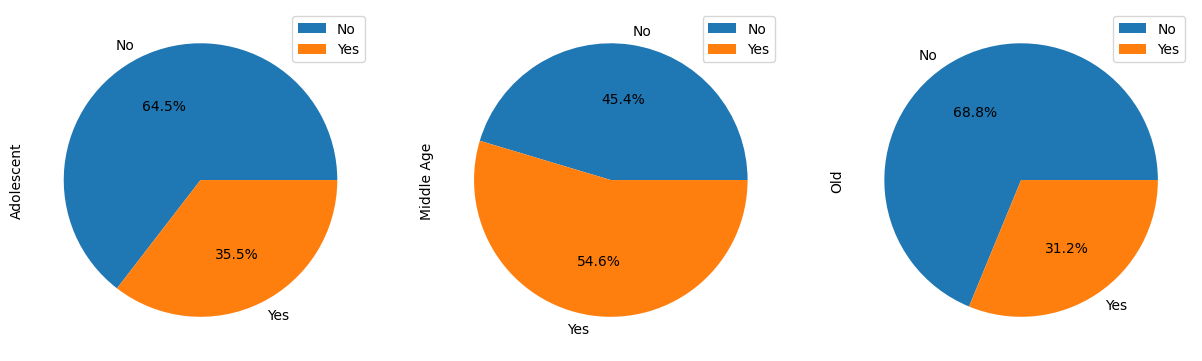

In [95]:
df.groupby(['Age Bracket','Purchased Bike']).size().unstack(0).plot(kind='pie',
                                                                    autopct='%1.1f%%',
                                                                    subplots=True,
                                                                    figsize=(15,21),
                                                                    )

54.6% of middle-aged people purchased bikes as compared to less than 50% for both Adolescents and Old people

### Do Married People purchase more bikes?

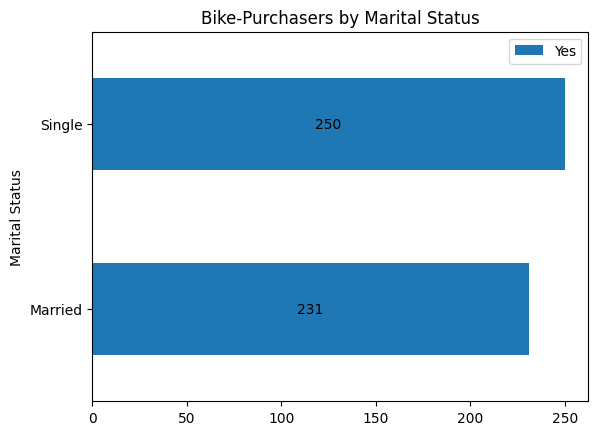

In [164]:
ax = df.groupby(['Marital Status', 'Purchased Bike']).size().unstack()['Yes'].plot(kind='barh', title="Bike-Purchasers by Marital Status")
ax.bar_label(ax.containers[0], label_type='center')
ax.legend()

Single people purchase slightly more bikes than married people

### But what percentage of them purchase bikes?

array([<Axes: ylabel='Married'>, <Axes: ylabel='Single'>], dtype=object)

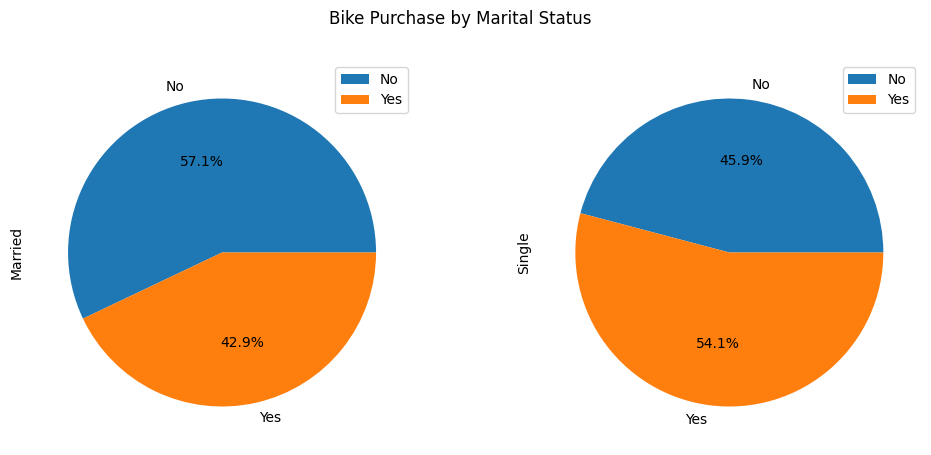

In [165]:
df.groupby(['Marital Status', 'Purchased Bike']).size().unstack(0).plot(kind='pie',
                                                                       subplots=True,
                                                                       autopct='%1.1f%%',
                                                                       figsize=(12, 5),
                                                                       title='Bike Purchase by Marital Status')

54% of Single people purchase bikes as opposed to 43% of Married people